#一、載入訓練跟測試集資料&顯示圖片

In [44]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [45]:
train_data=datasets.FashionMNIST(root="image",train=True,download=True,transform=ToTensor())
test_data=datasets.FashionMNIST(root="image",train=False,download=True,transform=ToTensor())

In [46]:
import torch
train_dataLoader= torch.utils.data.DataLoader(train_data,batch_size=32,shuffle=True)

Text(0.5, 1.0, 'Bag')

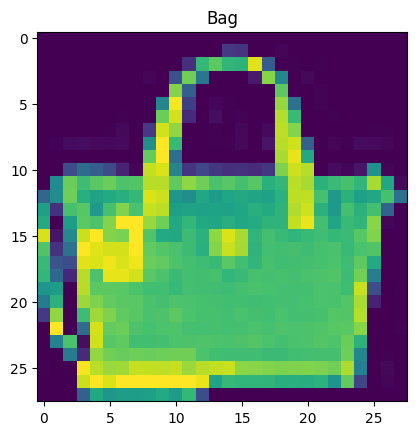

In [47]:
import random
import matplotlib.pyplot as plt

torch.manual_seed(87)
first_batch=next(iter(train_dataLoader))

index=random.randint(0,len(first_batch)-1)
img_batch,label_batch=first_batch
img,label=img_batch[index],label_batch[index]
plt.imshow(img.permute(1,2,0))
name=train_data.classes
plt.title(name[label])

#二、定義模型

In [48]:
from torch import nn
class imageClassificationModel(nn.Module):
  def __init__(self,input,output):
    super().__init__()
    self.sequential=nn.Sequential(
        nn.Flatten(start_dim=1, end_dim=-1),
        nn.Linear(in_features=input,out_features=output),
        #nn.Softmax(dim=1)
    )
  def forward(self,x):
    return self.sequential(x)

In [49]:
model = imageClassificationModel(784,10)
y_pred=model(img_batch)

#三、不斷更新

In [50]:
model.to("cuda")

imageClassificationModel(
  (sequential): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [51]:
from tqdm.auto import tqdm
for epoch in tqdm(range(3)):

  train_cost=0
  train_acc=0
  for (img_batch, label_batch) in (train_dataLoader):

    img_batch=img_batch.to("cuda")
    label_batch=label_batch.to("cuda")

    cost_fn=nn.CrossEntropyLoss()
    y_pred=model(img_batch)
    cost=cost_fn(y_pred,label_batch)

    optimizer=torch.optim.SGD(model.parameters(),lr=0.01)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    train_cost+=cost
    acc=((y_pred.argmax(dim=1)==label_batch).sum()/len(label_batch))*100
    train_acc+=acc

  avg_cost=train_cost/len(train_dataLoader)
  avg_acc=train_acc/len(train_dataLoader)

  print(f"epoch:{epoch},avg_cost:{avg_cost:.4f},avg_acc={avg_acc:.2f}")

  0%|          | 0/3 [00:00<?, ?it/s]

epoch:0,avg_cost:0.8163,avg_acc=74.87
epoch:1,avg_cost:0.5886,avg_acc=80.96
epoch:2,avg_cost:0.5400,avg_acc=82.36
